# Pooling

<p><b>Pooling layers</b> are part of Convolutional Neural Networks (CNN). While Convolutional layers are responsible for identifying features in images, Pooling layers play a role in summarizing the features acquired by CNNs. Their primary objective is to progressively reduce the spatial dimensions of the representation, thereby reducing the volume of parameters and computational load within the network. For example, if we take image of size 256x256 and kernel of polling 2x2 then after pooling we will get image of size 128x128. This will reduce the spatial dimensions (width and height) of the input volume while retaining  important features.
<p>There are many types of pooling layers, such Max Pooling, Min Pooling, Average Pooling, Stochastic Polling and etc. but we will discuss only most commonly used types.

## Max pooling

Max Pooling is mainly used type of pooling layer. It retains only the highest value from each kernel matrices and discards the other values.
This means that max pooling will take the sharpest pixels from original image and reduced image consequently will be sharper than original.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [47]:
matrix = np.random.randint(0, 10, size=(4, 4))
print(matrix)

[[2 0 9 9]
 [9 6 2 9]
 [1 5 4 9]
 [5 3 4 7]]


In [15]:
matrix = matrix.reshape(1,4,4,1)

max_pooling=tf.keras.layers.MaxPool2D(pool_size=2,strides=2)
max_pooled_matrix=max_pooling(matrix)
print
print(max_pooled_matrix.shape)
print(tf.squeeze(max_pooled_matrix))

(1, 2, 2, 1)
tf.Tensor(
[[9 8]
 [6 4]], shape=(2, 2), dtype=int32)


In [6]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_train, X_test = X_train/255.0, X_test/255.0
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [6]:
max_pool_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

max_pool_model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

In [8]:
%%time
max_pool_model.fit(X_train, y_train, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2148 - sparse_categorical_accuracy: 0.9394
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0511 - sparse_categorical_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0436 - sparse_categorical_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9883
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0325 - sparse_categorical_accuracy: 0.9903
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0325 - sparse_categorical_accuracy:

In [9]:
test_loss_max_pool, test_accuracy_max_pool = max_pool_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0559 - sparse_categorical_accuracy: 0.9835


In [12]:
y_pred_max_pool = max_pool_model.predict(X_test)
y_pred_max_pool = np.argmax(y_pred_max_pool, axis = 1) 

313/313 [==============================] - 2s 5ms/step


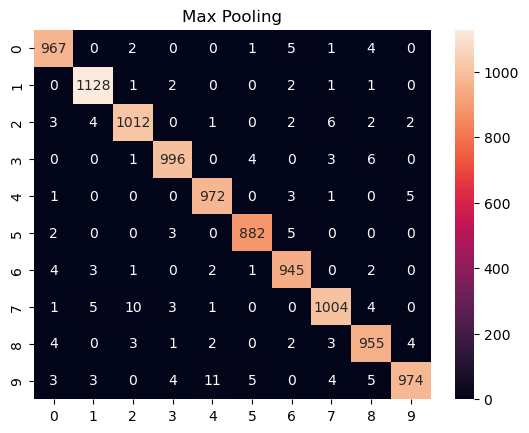

In [15]:
cm_max_pool = confusion_matrix(y_test, y_pred_max_pool)

sns.heatmap(cm_max_pool, annot=True, fmt='g')
plt.title('Max Pooling')
plt.show()

## Average pooling

 In this layer, each local region of the input feature map is subjected to an averaging operation, where the output value represents the mean of the values within that region. It makes resulting image more gradient than the original.

QUIZ!
What will be output of this matrix after Average Polling layer with kernel 2x2?
[[0 2 8 3]
 [4 2 4 3]
 [2 1 5 2]
 [8 3 6 8]]

In [4]:
matrix = np.array([[5.,6.,1.,4.],
                   [6.,3.,9.,2.],
                   [5.,0.,2.,4.],
                   [7.,0.,2.,0.]]).reshape(1,4,4,1)

average_pooling = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)
average_pooled_matrix = average_pooling(matrix)
print(average_pooled_matrix.shape)
print(tf.squeeze(average_pooled_matrix))

(1, 2, 2, 1)
tf.Tensor(
[[5. 4.]
 [3. 2.]], shape=(2, 2), dtype=float32)


In [51]:
avg_pool_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D((2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

avg_pool_model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

In [54]:
%%time
avg_pool_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9929
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0200 - sparse_categorical_accuracy: 0.9934
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9939
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0169 - sparse_categorical_accuracy: 0.9944
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0136 - sparse_categorical_accuracy: 0.9955
CPU times: total: 24min 22s
Wall time: 3min 42s


In [59]:
test_loss_avg_pool, test_accuracy_avg_pool = avg_pool_model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9795


In [56]:
y_pred_avg_pool = avg_pool_model.predict(X_test)
y_pred_avg_pool = np.argmax(y_pred_avg_pool, axis=1)

313/313 [==============================] - 6s 19ms/step


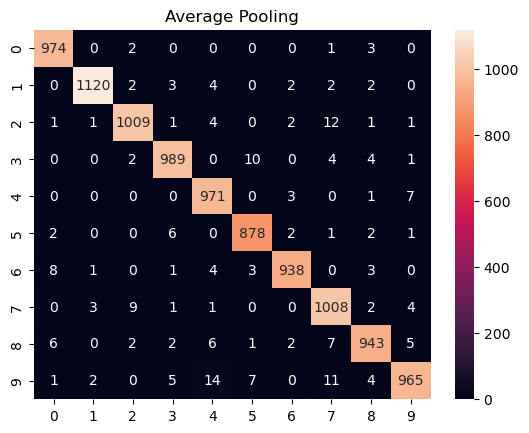

In [58]:
cm_avg_pool = confusion_matrix(y_test, y_pred_avg_pool)

sns.heatmap(cm_avg_pool, annot=True, fmt='g')
plt.title('Average Pooling')
plt.show()

![SegmentLocal](pooling.gif "Pooling layers")

Quiz!
In which situation is Max Pooling more suitable and in which Average Pooling?

![Max and Average pooling](Max-pooling-and-average-pooling.png)